<a href="https://colab.research.google.com/github/juhumkwon/DataMining/blob/main/yolo11m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving bird.jpg to bird (4).jpg

0: 640x416 1 bird, 28.0ms
Speed: 2.9ms preprocess, 28.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


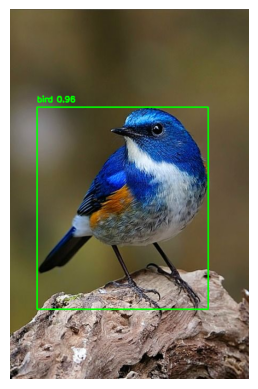

In [9]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
# %%

"""
Ultralytics 설치
Ultralytics 라이브러리는 YOLO (You Only Look Once) 시리즈의 공식 구현을 제공하는 Python 라이브러리로,
YOLOv5부터 최신 모델인 YOLO11까지를 지원합니다.
"""

!pip install ultralytics

from google.colab import files
# uploaded = files.upload()  # 로컬에서 이미지 파일을 업로드

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import io # import io module

# 모델 로드 (YOLO11m)
model = YOLO('yolo11m.pt')  # YOLO11m 사전 학습된 가중치 사용

# 테스트 이미지 로드
image_path = files.upload()  # 로컬에서 이미지 파일을 업로드
# Get the filename and file content from the uploaded dictionary
filename = list(image_path.keys())[0]
# Read the image content into a NumPy array using OpenCV
image_stream = io.BytesIO(image_path[filename]) # create an in-memory stream
image = cv2.imdecode(np.frombuffer(image_stream.read(), np.uint8), cv2.IMREAD_COLOR)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 이미지를 RGB로 변환

# 모델 추론
results = model.predict(source=image, conf=0.5, save=False)  # conf는 신뢰도 임계값

# 결과 시각화
for result in results:
    # 각 객체의 바운딩 박스와 클래스 이름 표시
    for box in result.boxes:
        # Convert the tensor to a list of integers
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Access the first element of the tensor
        conf = box.conf[0]
        class_name = model.names[int(box.cls[0])]

        # 바운딩 박스 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{class_name} {conf:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 이미지 출력
plt.imshow(image)
plt.axis('off')
plt.show()
